In [43]:
import pandas as pd
import scipy as sc
import numpy as np

In [44]:
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [45]:
newland_train = pd.read_excel('Train.xlsx')
newland_test = pd.read_excel('Test.xlsx')

# Data Exploration Test

In [46]:
newland_test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0


In [47]:
newland_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              10100 non-null  int64 
 1   Name                    10100 non-null  object
 2   Birthday                10100 non-null  object
 3   Native Continent        10100 non-null  object
 4   Marital Status          10100 non-null  object
 5   Lives with              10100 non-null  object
 6   Base Area               10100 non-null  object
 7   Education Level         10100 non-null  object
 8   Years of Education      10100 non-null  int64 
 9   Employment Sector       10100 non-null  object
 10  Role                    10100 non-null  object
 11  Working Hours per week  10100 non-null  int64 
 12  Money Received          10100 non-null  int64 
 13  Ticket Price            10100 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


# Data Exploration TRAIN

In [48]:
newland_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [49]:
newland_train.head() 

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [50]:
newland_train.describe(include = 'all')

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Dominic Morrison,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


# DIvision Metric vs NON Metric features

In [51]:
newland_train

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0
22396,34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0
22397,34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0
22398,34884,Mr. Justin Sutherland,"June 11,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,0,0,1


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

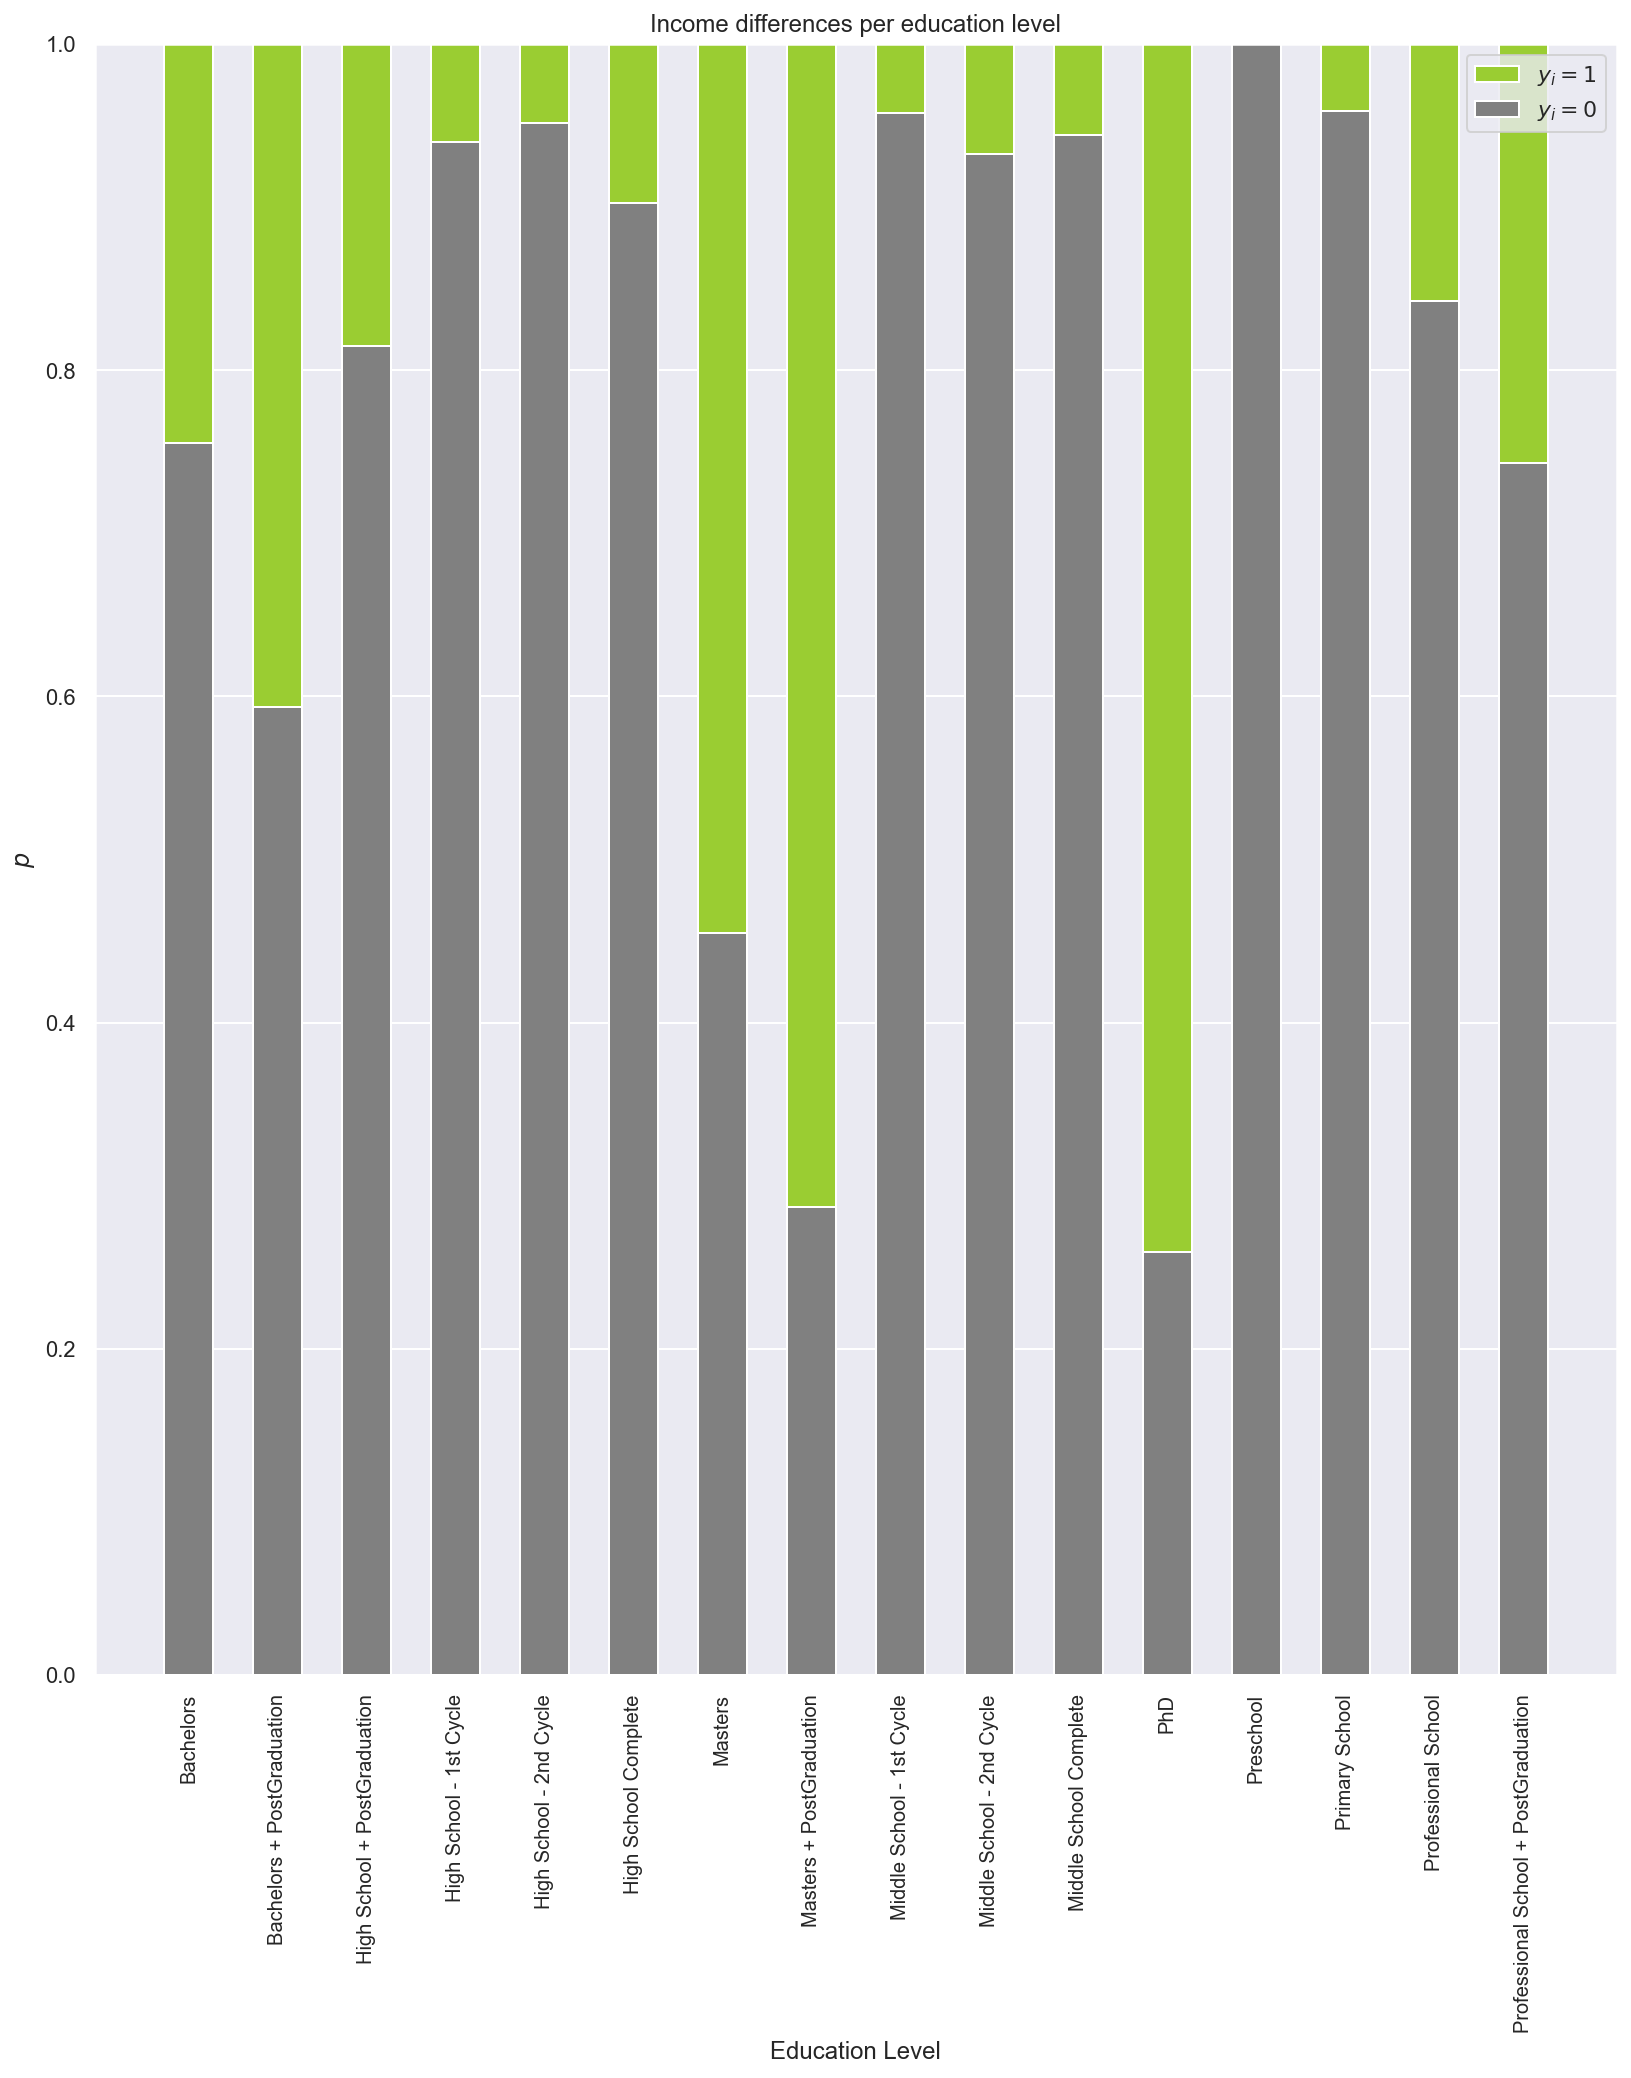

In [53]:
#Relation betwee Income and Education Level

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Income differences per education level")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)

    plt.show()
    
bar_charts_categorical(newland_train, "Education Level", "Income")

In [ ]:
#Relation between group belonging and income
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per group")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Group", "Income")

In [ ]:
#Relation betwee role and income

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(60, 30))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per role")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Role", "Income")

In [ ]:
#Relation between employment sector and income
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per employment sector")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Employment Sector", "Income")

In [ ]:
#Relation between base area and income

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per base area")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Base Area", "Income")

In [ ]:
#Relation between income and family size
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per people live with")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Lives with", "Income")

In [ ]:
#Relation between income and marital status
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),fontsize="xx-large")
    plt.title("Differences of income per marital status")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)

    plt.show()
    
bar_charts_categorical(newland_train, "Marital Status", "Income")

In [ ]:
#Relational between Native continent and income
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Differences of income per native continent")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Income")

# Feature Engineering ( created age , group)

In [55]:
from datetime import datetime
import calendar

In [56]:
#Created the variable age
newland_train["Birth_year"] = newland_train["Birthday"].str.split(',', expand=True)[1]
newland_train["Birth_year"] = newland_train["Birth_year"].astype(int)
newland_train["Age"] = 2046 - newland_train["Birth_year"]

In [57]:
#Created the variable Group
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'A'
newland_train.loc[(newland_train['Money Received'] > 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'B'
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] > 0), 'Group'] = 'C'

In [58]:
newland_train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Birth_year,Age,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,2003,43,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,2006,40,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,2009,37,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,1985,61,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,2015,31,A


# DATA VISUALIZATION

In [59]:
#Definition of metric and non metric features
metric_features = newland_train[['Years of Education', 'Working Hours per week', 'Age', 'Income']]
non_metric_features = newland_train.drop(metric_features,axis=1)


# Feature Extraction (elimination of 4 columns, ajustment of index with CITIZEN_ID)

In [60]:
#Removed 4 columns
newland_train.drop(columns=['Birthday', 'Name', 'Birth_year', 'Money Received','Ticket Price'], inplace=True)

In [61]:
#citizen_id is put as index
newland_train.set_index('CITIZEN_ID', inplace=True)

# Fill missing values (Data imputation - Employment Sector) . Mode,median, KNN

# Outlier removal (manually, IQR)

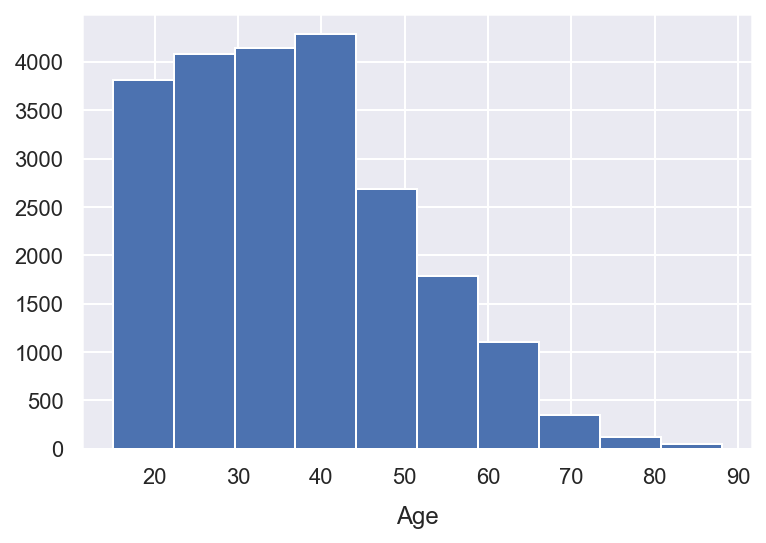

In [62]:
# Age Histogram
plt.hist(newland_train["Age"], bins=10)  # mess around with the bins
plt.title("Age", y=-0.2)

plt.show()

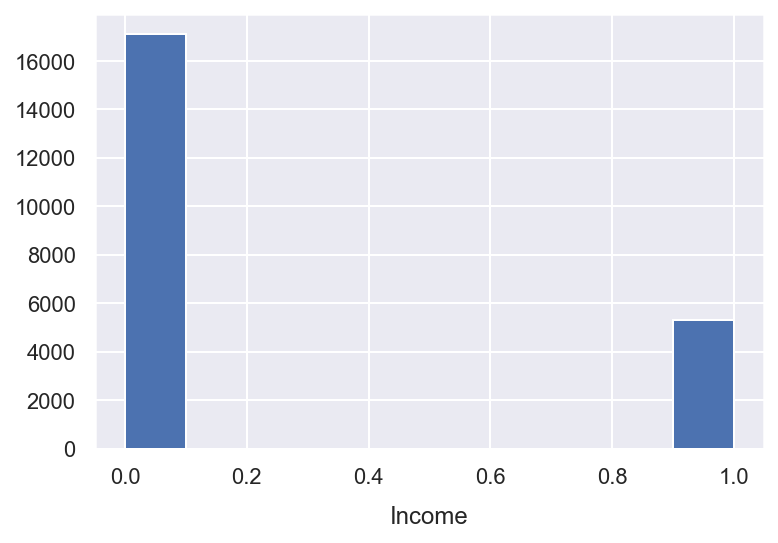

In [63]:
# Income Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Income"], bins=10)  # mess around with the bins
plt.title("Income", y=-0.2)

plt.show()

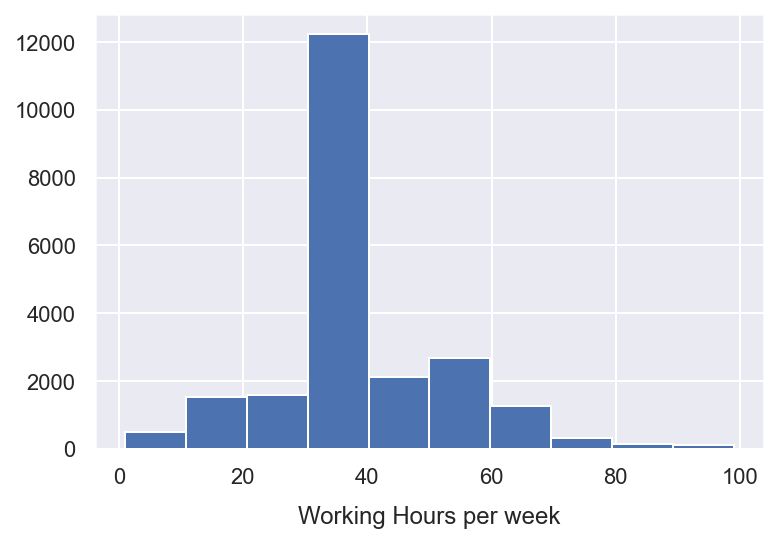

In [64]:
# Working hours per Week Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Working Hours per week"], bins=10)  # mess around with the bins
plt.title("Working Hours per week", y=-0.2)

plt.show()

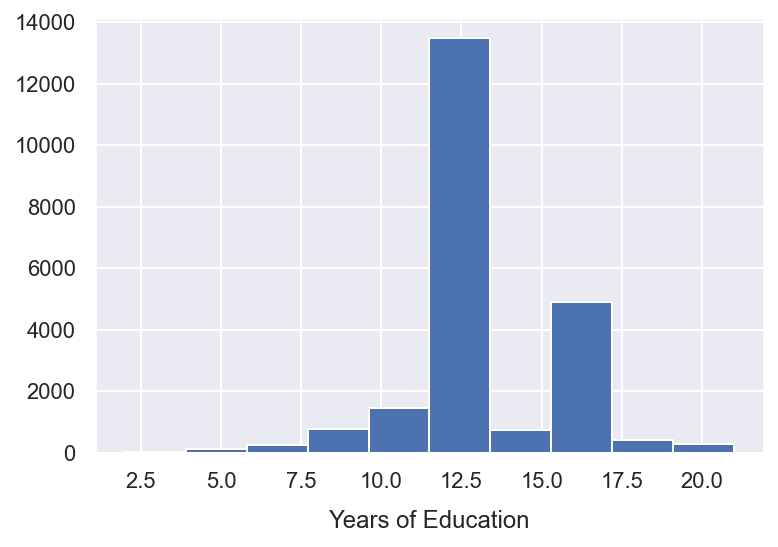

In [65]:
# Years of Education Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Years of Education"], bins=10)  # mess around with the bins
plt.title("Years of Education", y=-0.2)

plt.show()

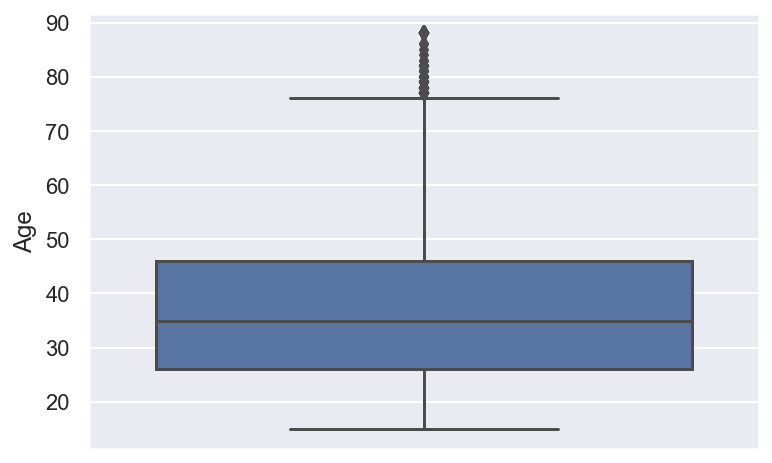

In [66]:
# Age Variable Box Plot
sns.boxplot(y=newland_train["Age"])

plt.show()

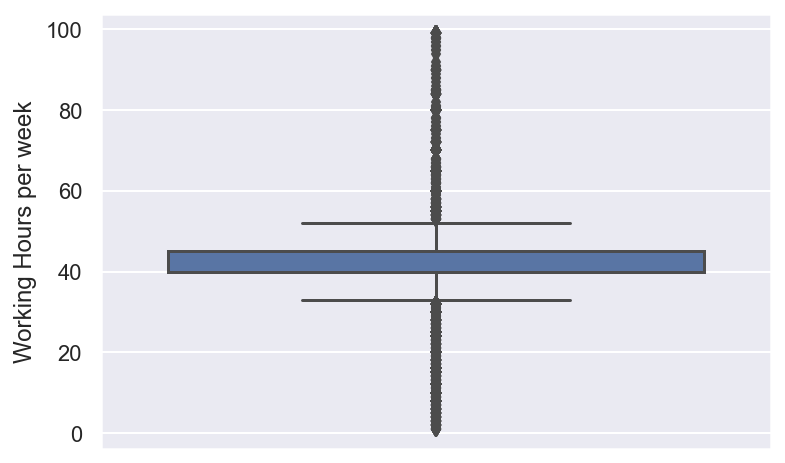

In [67]:
# Working Hours per week Variable Box Plot
sns.boxplot(y=newland_train["Working Hours per week"])

plt.show()

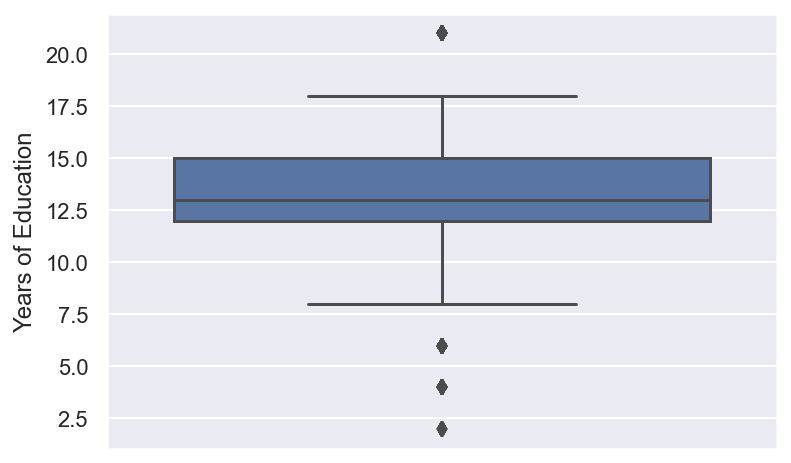

In [68]:
# Years of Education Variable Box Plot
sns.boxplot(y=newland_train["Years of Education"])

plt.show()

In [69]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(newland_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000028164DB3790> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(df[feat], ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

In [ ]:
# Single Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
sns.countplot(x=newland_train["Native Continent"])

plt.show()

In [ ]:
# Marital Status Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Marital Status"], order = newland_train["Marital Status"].value_counts().index)

plt.show()

In [ ]:
# Lives with Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Lives with"], order = newland_train["Lives with"].value_counts().index)

plt.show()

In [ ]:
# Base Area Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(20,20))
sns.countplot(x=newland_train["Base Area"],order = newland_train["Base Area"].value_counts().index )
plt.show()

In [ ]:
# Education Level Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Education Level"], order = newland_train["Education Level"].value_counts().index)

plt.show()

In [ ]:
# Employment Sector Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Employment Sector"], order = newland_train["Employment Sector"].value_counts().index)
plt.show()

In [ ]:
# Role Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Role"],order = newland_train["Role"].value_counts().index)
plt.show()

In [ ]:
# Group Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(10,10))
sns.countplot(x=newland_train["Group"], order = newland_train["Group"].value_counts().index)
plt.show()

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "names", y = "values", ax=ax, data=df)


# Variable Selection Redundancy

In [ ]:
#pearson
cor_pearson= newland_train.corr()
cor_pearson

In [ ]:
#spearman
cor_spearman = newland_train.corr(method ='spearman')
cor_spearman

In [ ]:
#heatmap pearson
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data = cor_pearson, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

In [ ]:
#heatmap pearson
plt.figure(figsize=(12,10))
sns.heatmap(data = cor_spearman, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show() #Our numerical variables are independent, not redundant

# Relevancy - Data Normalization/Standardization (minmax, std) - metric variables

# Encoding of non_metric/categorical variables (ordinalencoding, onehot encoding)

In [70]:
from sklearn.preprocessing import OrdinalEncoder

#Encoding of educational level
    
EduLvlDict = {"Preschool":0,"Primary School":1,"Middle School - 1st Cycle":2,"Middle School - 2nd Cycle":3,"Middle School Complete":4,
              "High School - 1st Cycle":5,"High School - 2nd Cycle":6,"High School Complete":7,"High School + PostGraduation":8,"Professional School":9,
              "Professional School + PostGraduation":10,"Bachelors":11,"Bachelors + PostGraduation":12,"Masters":13,"Masters + PostGraduation":14,"PhD":15}


non_metric_features.replace({"Education Level": EduLvlDict}, inplace = True)




In [71]:
non_metric_features["Education Level"]

0         8
1         9
2         9
3         6
4        15
         ..
22395     9
22396     9
22397    13
22398    12
22399     8
Name: Education Level, Length: 22400, dtype: int64

In [96]:
# Use OneHotEncoder to encode the categorical features except education level

from sklearn.preprocessing import OneHotEncoder
df_ohc = newland_train.copy()
non_metric_features1= newland_train.drop(metric_features,axis=1)
non_metric_features1
ohc_df["Income"]=newland_train["Income"]
df_ohc = df_ohc.reset_index()
# #non_metric_features1=non_metric_features1.drop(["Education Level","CITIZEN_ID"],axis=1)
df_ohc

,CITIZEN_ID,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Income,Age,Group
0,12486,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,1,43,C
1,12487,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,1,40,A
2,12488,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,1,37,C
3,12489,Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,1,61,B
4,12490,Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,1,31,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,23,A
22396,34882,Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,21,A
22397,34883,Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,0,24,B
22398,34884,Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,1,35,A


In [90]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(non_metric_features1)
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Married,x1_Married - Spouse Missing,x1_Married - Spouse in the Army,x1_Separated,x1_Single,x1_Widow,...,x6_Machine Operators & Inspectors,x6_Management,x6_Other services,x6_Professor,x6_Repair & constructions,x6_Sales,x6_Security,x6_Transports,x7_B,x7_C
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22398,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#Correlation of categoricals 

cor_pearson= ohc_df.corr()
cor_pearson


,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Married,x1_Married - Spouse Missing,x1_Married - Spouse in the Army,x1_Separated,x1_Single,x1_Widow,...,x6_Management,x6_Other services,x6_Professor,x6_Repair & constructions,x6_Sales,x6_Security,x6_Transports,x7_B,x7_C,Income
x0_America,1.000000,-0.017833,-0.239520,-0.009043,-0.018136,0.021182,-0.002485,0.000433,0.001442,0.005741,...,-0.007337,0.000960,-0.012057,0.002298,-0.011100,-0.001292,0.020263,-0.001508,-0.013554,0.006140
x0_Asia,-0.017833,1.000000,-0.432622,-0.016333,0.015523,0.039329,-0.004488,-0.013013,0.008501,-0.008463,...,-0.000995,0.012409,0.033210,-0.022702,-0.005662,-0.012887,-0.018557,-0.000158,0.002441,0.004711
x0_Europe,-0.239520,-0.432622,1.000000,-0.219374,0.113060,-0.048815,0.010374,-0.081513,-0.076684,-0.011490,...,0.051391,-0.084649,0.026999,0.050531,0.033717,-0.024206,0.004880,0.029454,0.023318,-0.007871
x0_Oceania,-0.009043,-0.016333,-0.219374,1.000000,-0.020796,0.025053,-0.002276,0.012113,0.021107,-0.004895,...,-0.022407,0.021586,0.000887,-0.002932,-0.013733,0.001070,-0.001849,-0.014527,-0.010922,0.029814
x1_Married,-0.018136,0.015523,0.113060,-0.020796,1.000000,-0.103793,-0.022905,-0.164385,-0.644368,-0.164020,...,0.107641,-0.160252,0.034506,0.120940,-0.003300,0.033032,0.073682,0.125999,0.076844,0.020192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x6_Security,-0.001292,-0.012887,-0.024206,0.001070,0.033032,-0.010538,-0.003581,-0.000078,-0.024328,-0.012804,...,-0.054085,-0.048282,-0.054658,-0.054063,-0.051103,1.000000,-0.032085,-0.000933,-0.000352,0.012068
x6_Transports,0.020263,-0.018557,0.004880,-0.001849,0.073682,-0.010433,-0.005604,-0.007727,-0.058944,-0.019628,...,-0.084644,-0.075562,-0.085540,-0.084609,-0.079977,-0.032085,1.000000,-0.010378,0.003416,0.004137
x7_B,-0.001508,-0.000158,0.029454,-0.014527,0.125999,-0.011979,0.005573,-0.019833,-0.100917,-0.003683,...,0.069607,-0.062437,0.064537,-0.012615,0.007719,-0.000933,-0.010378,1.000000,-0.066417,-0.008720
x7_C,-0.013554,0.002441,0.023318,-0.010922,0.076844,-0.004519,-0.005565,-0.013300,-0.055003,-0.005876,...,0.041409,-0.040969,0.050276,0.002619,0.004368,-0.000352,0.003416,-0.066417,1.000000,-0.001962


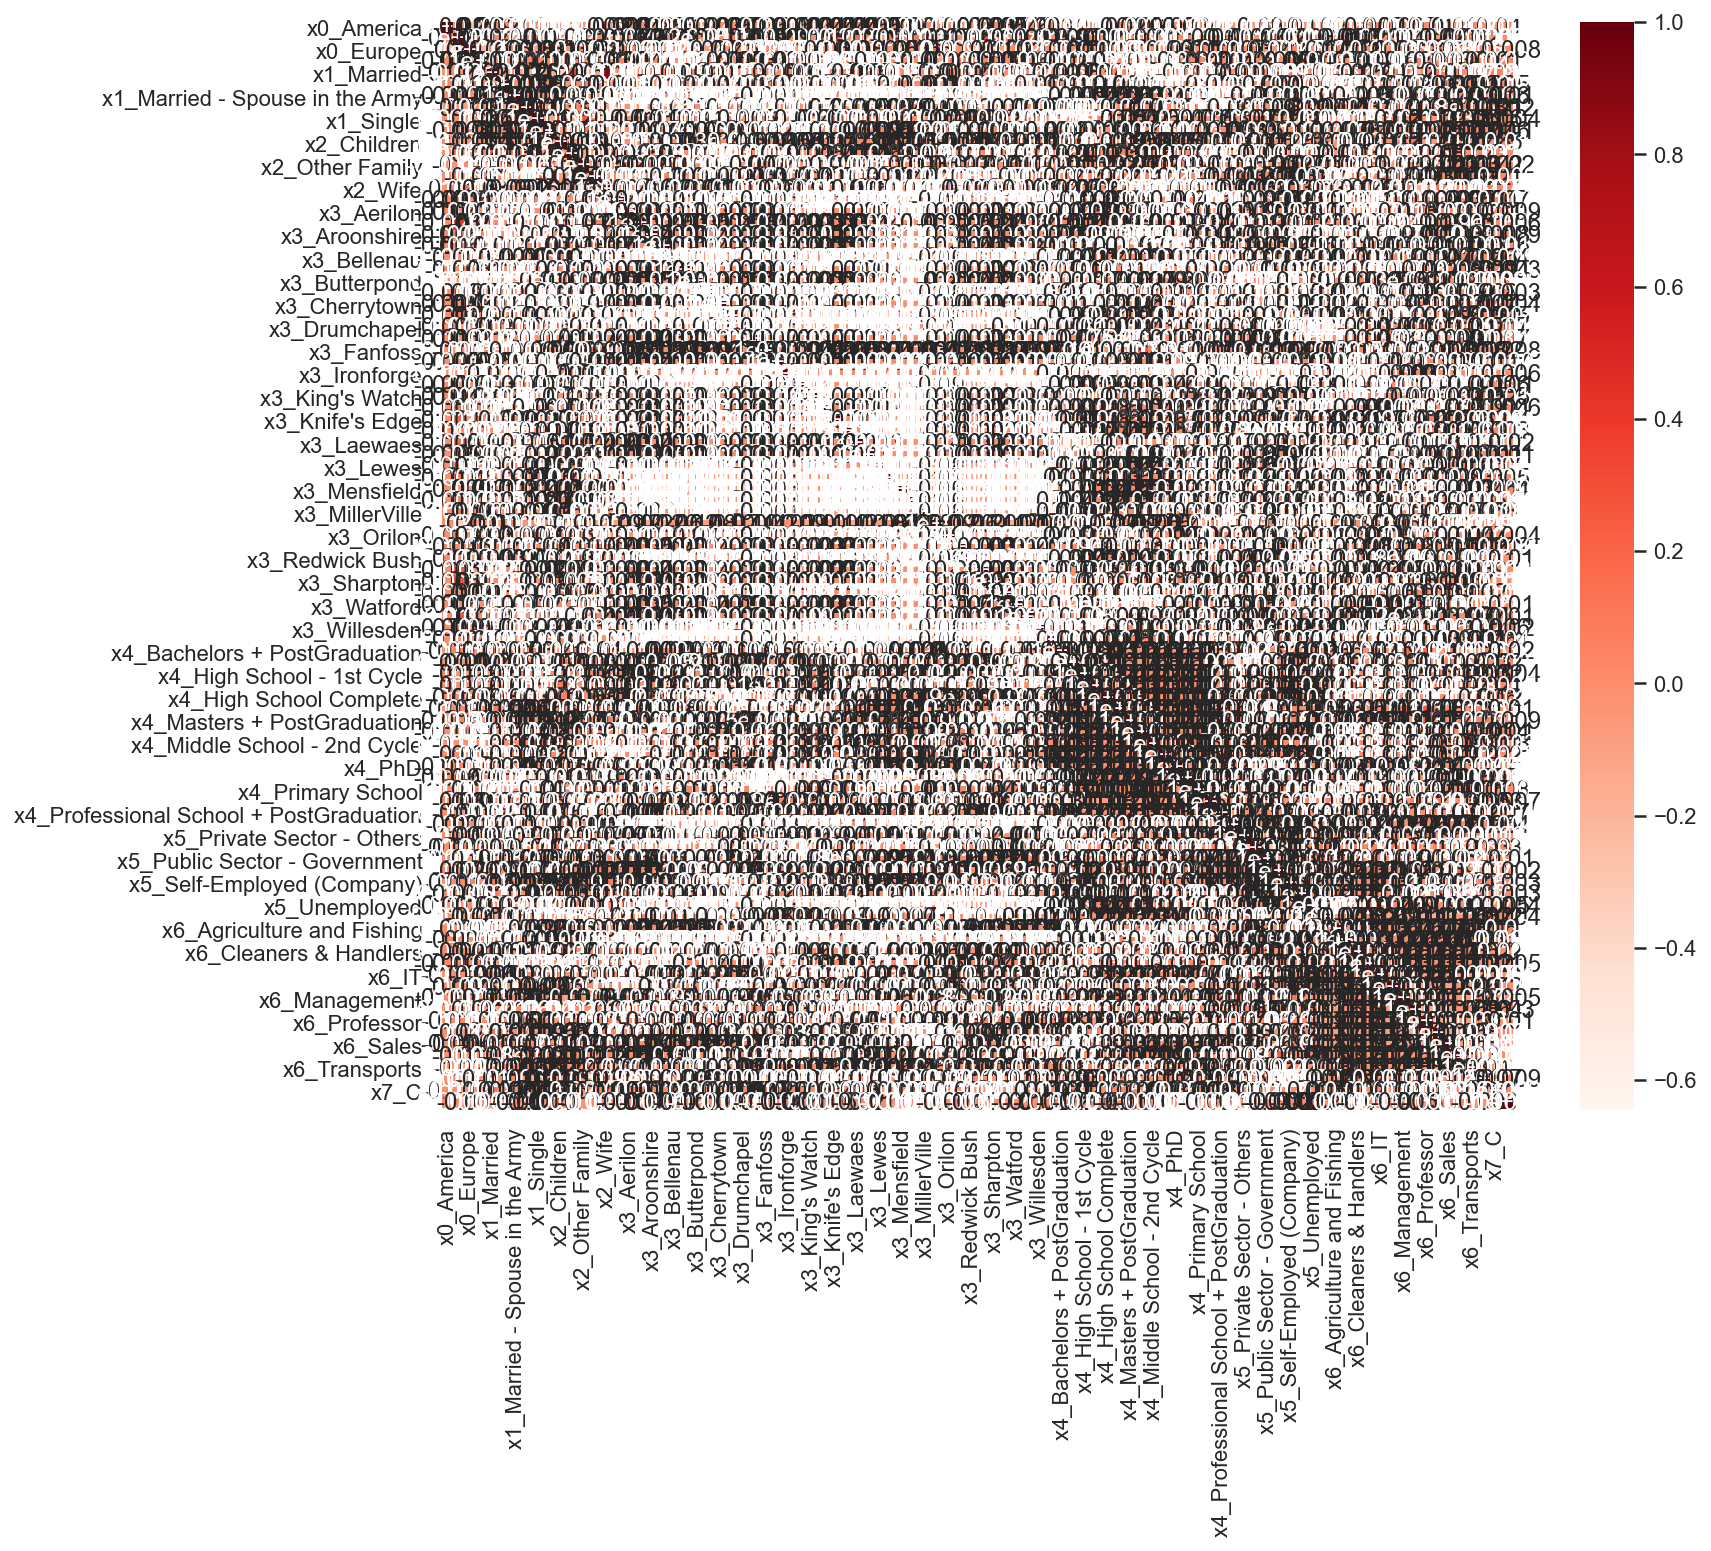

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data = cor_pearson, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

# Dimensionality Reduction (PCA)

# Pandas Profilling

In [ ]:
from itertools import product
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(
newland_train,
title='Newland_Profiling',
correlations={
"pearson": {"calculate": True},
"spearman": {"calculate": False},
"kendall": {"calculate": False},
"phi_k": {"calculate": False},
"cramers": {"calculate": False},
},
)

In [ ]:
profile.to_notebook_iframe()